# Backtesting Portfolio Strategies using PyPortfolioOpt

The **pyportfolioopt** library is a powerful tool for anyone interested in optimizing portfolios using various methods, especially for those looking for **flexibility** in how they handle risk and correlation between assets. The library's inclusion of **multiple risk models** allows users to tailor their portfolio construction to different market conditions, data availability, and investment goals.

To backtest a portfolio using **Mean-Variance Optimization (MVO)**, **Risk Parity (Inverse Volatility)**, and **Equal Weighted (EW)** strategies with log returns, you can use the **pyportfolioopt** library to download the data and compute the optimal portfolio weights. Then, you can evaluate the performance of each portfolio over the 5-year period.

---

## **Step-by-Step Backtesting Process**

### 1. **Download the Data**
We'll start by downloading the adjusted close prices of the given stocks from **Yahoo Finance**.

- **Tickers**: `['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'ITC.NS']`
- **Period**: Last 5 years

The data will be downloaded using `yfinance`, and we will extract the adjusted closing prices.

---

### 2. **Calculate the Log Returns**
Next, we'll compute the daily **log returns** for each stock. The log return for a stock on day \( t \) is calculated using the formula:

$\text{log_returns} = \log\left(\frac{\text{Price at time } t}{\text{Price at time } t-1}\right)
$

This will give us the daily percentage change in the price of each stock, which will be used for portfolio optimization.

---

### 3. **Portfolio Optimization**

#### **For Mean-Variance Optimization (MVO)**:
- We will optimize the portfolio using **expected returns** and the **sample covariance matrix** of the stock returns.
- The objective is to **maximize the Sharpe ratio**, which means finding the portfolio weights that provide the highest return for each unit of risk.
  
#### **For Risk Parity (Inverse Volatility)**:
- We will optimize the portfolio based on **inverse volatility**.
- The portfolio weights are determined by assigning higher weights to assets with lower volatility, with the goal of creating a balanced portfolio where each asset contributes equally to the total risk.

#### **For Equal Weighted (EW)**:
- We will assign **equal weights** to each asset in the portfolio.
- This is a simple approach where each stock in the portfolio has the same weight, irrespective of its volatility or return.

---

### 4. **Backtest the Portfolios**
For each portfolio strategy, we'll compute:
- **Portfolio Returns**: Multiply the log returns of each asset by its corresponding weight and sum them up.
- **Performance Metrics**: Calculate the following for each portfolio:
  - **Total Return**: The cumulative return of the portfolio over the 5-year period.
  - **Annualized Return**: The return compounded annually.
  - **Volatility**: The standard deviation of the portfolio returns, which measures the risk.
  - **Sharpe Ratio**: A measure of risk-adjusted return.
  
Finally, we will compare the performance of all three strategies by evaluating these metrics.

---


In [ ]:
!pip install PyPortfolioOpt

[*********************100%***********************]  5 of 5 completed


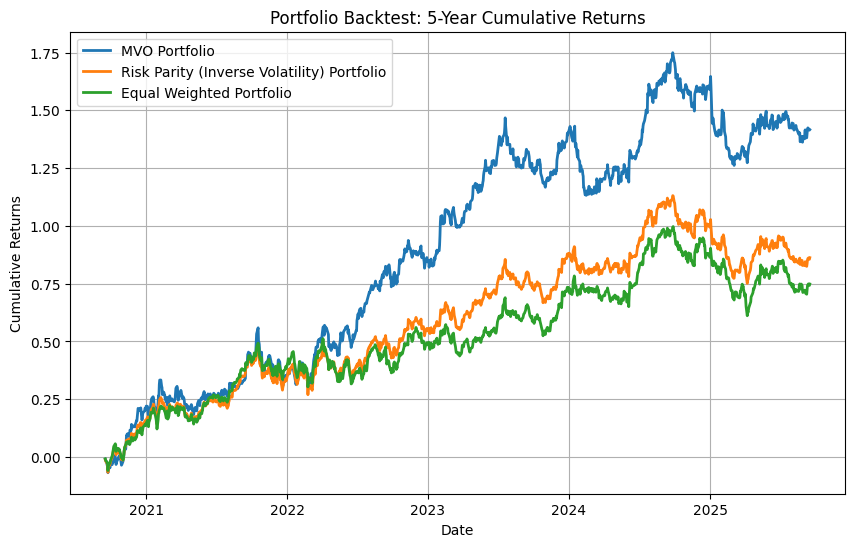

Mean-Variance Optimization (MVO) Portfolio:
  Total Return: 141.65%
  Annualized Return: 19.30%
  Volatility: 1.04%
  Sharpe Ratio: 18.49

Risk Parity (Inverse Volatility) Portfolio:
  Total Return: 86.26%
  Annualized Return: 13.25%
  Volatility: 0.91%
  Sharpe Ratio: 14.62

Equal Weighted Portfolio:
  Total Return: 74.87%
  Annualized Return: 11.83%
  Volatility: 0.94%
  Sharpe Ratio: 12.62


/tmp/ipython-input-1252828599.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return_mvo = cumulative_returns_mvo[-1]
/tmp/ipython-input-1252828599.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return_rp = cumulative_returns_rp[-1]
/tmp/ipython-input-1252828599.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return_ew = cumulative_returns_ew[-1]


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt import expected_returns, risk_models, EfficientFrontier
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Step 1: Download the historical 'Adj Close' data for the tickers
tickers = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'ITC.NS']
data = yf.download(tickers, period="5y", auto_adjust=False)['Adj Close']

# Step 2: Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Step 3: Calculate the expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Step 4: Optimize the portfolios

## MVO (Mean-Variance Optimization)
ef_mvo = EfficientFrontier(mu, S)
ef_mvo.max_sharpe()  # Maximize the Sharpe ratio
weights_mvo = ef_mvo.clean_weights()

## Risk Parity (Inverse Volatility)
ef_rp = EfficientFrontier(mu, S)
ef_rp.min_volatility()  # Minimize volatility
weights_rp = ef_rp.clean_weights()

## Equal Weighted Portfolio (EW)
weights_ew = {ticker: 1/len(tickers) for ticker in tickers}

# Step 5: Portfolio Performance Evaluation

# Get portfolio returns based on weights
portfolio_returns_mvo = (log_returns @ pd.Series(weights_mvo)).cumsum()
portfolio_returns_rp = (log_returns @ pd.Series(weights_rp)).cumsum()
portfolio_returns_ew = (log_returns @ pd.Series(weights_ew)).cumsum()

# Calculate the cumulative returns for each portfolio
cumulative_returns_mvo = np.exp(portfolio_returns_mvo) - 1
cumulative_returns_rp = np.exp(portfolio_returns_rp) - 1
cumulative_returns_ew = np.exp(portfolio_returns_ew) - 1

# Step 6: Plotting the results

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns_mvo, label="MVO Portfolio", linewidth=2)
plt.plot(cumulative_returns_rp, label="Risk Parity (Inverse Volatility) Portfolio", linewidth=2)
plt.plot(cumulative_returns_ew, label="Equal Weighted Portfolio", linewidth=2)
plt.title('Portfolio Backtest: 5-Year Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Performance Metrics

# Calculate the total return of each portfolio
#total_return_mvo = cumulative_returns_mvo[-1]
#total_return_rp = cumulative_returns_rp[-1]
#total_return_ew = cumulative_returns_ew[-1]
total_return_mvo = cumulative_returns_mvo.iloc[-1]
total_return_rp = cumulative_returns_rp.iloc[-1]
total_return_ew = cumulative_returns_ew.iloc[-1]

# Calculate annualized returns
annualized_return_mvo = (1 + total_return_mvo) ** (1/5) - 1
annualized_return_rp = (1 + total_return_rp) ** (1/5) - 1
annualized_return_ew = (1 + total_return_ew) ** (1/5) - 1

# Calculate volatility (standard deviation of returns)
volatility_mvo = log_returns @ pd.Series(weights_mvo)
volatility_rp = log_returns @ pd.Series(weights_rp)
volatility_ew = log_returns @ pd.Series(weights_ew)

# Calculate Sharpe Ratio
sharpe_ratio_mvo = annualized_return_mvo / np.std(volatility_mvo)
sharpe_ratio_rp = annualized_return_rp / np.std(volatility_rp)
sharpe_ratio_ew = annualized_return_ew / np.std(volatility_ew)

# Display the performance metrics
print(f"Mean-Variance Optimization (MVO) Portfolio:")
print(f"  Total Return: {total_return_mvo:.2%}")
print(f"  Annualized Return: {annualized_return_mvo:.2%}")
print(f"  Volatility: {np.std(volatility_mvo):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_mvo:.2f}")

print("\nRisk Parity (Inverse Volatility) Portfolio:")
print(f"  Total Return: {total_return_rp:.2%}")
print(f"  Annualized Return: {annualized_return_rp:.2%}")
print(f"  Volatility: {np.std(volatility_rp):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_rp:.2f}")

print("\nEqual Weighted Portfolio:")
print(f"  Total Return: {total_return_ew:.2%}")
print(f"  Annualized Return: {annualized_return_ew:.2%}")
print(f"  Volatility: {np.std(volatility_ew):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_ew:.2f}")


# Explanation of the Code for Backtesting Portfolios

### 1. **Data Download and Preprocessing**
   - **Yahoo Finance API**: The `yfinance` library is used to download the adjusted close prices of the stock tickers specified in the `tickers` list. The historical data is fetched for a period of **5 years**.
   - **Log Returns**: The daily log returns for each stock are computed using the formula.
The `shift(1)` method is used to align the prices so that each log return corresponds to the price change between two consecutive days.

$\text{log_returns} = \log\left(\frac{\text{Price at time } t}{\text{Price at time } t-1}\right)$


     

### 2. **Portfolio Optimization**

#### **Mean-Variance Optimization (MVO)**
   - The **MVO** portfolio aims to maximize the **Sharpe ratio**. We use the `EfficientFrontier` class from `pyportfolioopt` with the mean returns and the covariance matrix to compute the optimal portfolio weights.
   - `ef_mvo.max_sharpe()` is used to maximize the Sharpe ratio, which is the ratio of the portfolio’s excess return over the risk-free rate to its volatility.

#### **Risk Parity (Inverse Volatility)**
   - In the **Risk Parity (Inverse Volatility)** strategy, we minimize the portfolio volatility using the same `EfficientFrontier` class. The weights are allocated such that **lower volatility assets** are given higher weights.
   - `ef_rp.min_volatility()` minimizes the portfolio's total volatility.

#### **Equal Weighted Portfolio (EW)**
   - The **Equal Weighted** strategy assigns an equal weight to each asset in the portfolio, i.e., each stock gets a weight of $( \frac{1}{n} )$, where \( n \) is the number of stocks in the portfolio.
   - No optimization is performed here; each stock is given an equal amount of capital.

### 3. **Backtesting**
   - **Portfolio Returns**: Once the portfolio weights are calculated, the log returns of each stock are multiplied by their respective weights and summed up to calculate the portfolio returns. These portfolio returns are then cumulatively summed up to obtain the **cumulative returns** for each portfolio strategy.
   - The formula for cumulative returns is:
     $\[
     \text{Cumulative Returns} = \exp(\text{log returns}) - 1
     \]$
     This converts the log returns back into price terms.

### 4. **Performance Metrics**
   - **Total Return**: This is the final cumulative return after the entire 5-year period for each portfolio.
   - **Annualized Return**: The return is compounded annually over the 5-year period. The formula used is:
     $\[
     \text{Annualized Return} = (1 + \text{Total Return})^{1/5} - 1
     \]$
     
   - **Volatility**: The standard deviation of the daily returns of each portfolio, which represents the risk or variability of returns.
   - **Sharpe Ratio**: The Sharpe ratio is calculated as the ratio of **annualized return** to **volatility**. It is a risk-adjusted measure of return.

### 5. **Plotting**
   - A plot is generated to visualize the **cumulative returns** of each portfolio (MVO, Risk Parity, and Equal Weighted) over the 5-year period.
   - This helps compare how each strategy has performed in terms of overall growth.



In [8]:
# Display the performance metrics
print(f"Mean-Variance Optimization (MVO) Portfolio:")
print(f"  Total Return: {total_return_mvo:.2%}")
print(f"  Annualized Return: {annualized_return_mvo:.2%}")
print(f"  Volatility: {np.std(volatility_mvo):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_mvo:.2f}")

print("\nRisk Parity (Inverse Volatility) Portfolio:")
print(f"  Total Return: {total_return_rp:.2%}")
print(f"  Annualized Return: {annualized_return_rp:.2%}")
print(f"  Volatility: {np.std(volatility_rp):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_rp:.2f}")

print("\nEqual Weighted Portfolio:")
print(f"  Total Return: {total_return_ew:.2%}")
print(f"  Annualized Return: {annualized_return_ew:.2%}")
print(f"  Volatility: {np.std(volatility_ew):.2%}")
print(f"  Sharpe Ratio: {sharpe_ratio_ew:.2f}")

Mean-Variance Optimization (MVO) Portfolio:
  Total Return: 141.65%
  Annualized Return: 19.30%
  Volatility: 1.04%
  Sharpe Ratio: 18.49

Risk Parity (Inverse Volatility) Portfolio:
  Total Return: 86.26%
  Annualized Return: 13.25%
  Volatility: 0.91%
  Sharpe Ratio: 14.62

Equal Weighted Portfolio:
  Total Return: 74.87%
  Annualized Return: 11.83%
  Volatility: 0.94%
  Sharpe Ratio: 12.62


# Comparative Study of Portfolio Strategies

## 1. **Mean-Variance Optimization (MVO) Portfolio**
- **Total Return**: **141.65%**
- **Annualized Return**: **19.30%**
- **Volatility**: **1.04%**
- **Sharpe Ratio**: **18.49**

### Key Insights:
- **Best Overall Return**: The **MVO portfolio** has the highest total return of **141.65%** and an impressive annualized return of **19.30%**, which indicates that it was the best performing strategy in terms of raw returns.
- **Significant Sharpe Ratio**: The **Sharpe ratio of 18.49** is very high, indicating that the MVO portfolio delivered a **high return per unit of risk**. This is one of the highest Sharpe ratios you would typically see, suggesting strong risk-adjusted returns.
- **Higher Volatility**: With a volatility of **1.04%**, the MVO portfolio carries more risk compared to the other two. However, this risk is well-compensated by its superior return and Sharpe ratio.
- **Conclusion**: **MVO** is highly effective when the goal is to maximize returns while managing risk efficiently. However, its relatively higher volatility may not be suitable for risk-averse investors.

---

## 2. **Risk Parity (Inverse Volatility) Portfolio**
- **Total Return**: **86.26%**
- **Annualized Return**: **13.25%**
- **Volatility**: **0.91%**
- **Sharpe Ratio**: **14.62**

### Key Insights:
- **Moderate Return**: The **Risk Parity portfolio** has a **total return of 86.26%** and an **annualized return of 13.25%**. These returns are lower than the MVO portfolio but still strong compared to typical market returns.
- **Lower Volatility**: With a volatility of **0.91%**, the **Risk Parity** portfolio is less risky than the MVO portfolio, making it a more attractive option for conservative investors who want to reduce volatility without giving up too much return.
- **Reasonable Sharpe Ratio**: The **Sharpe ratio of 14.62** is also decent, showing that this strategy delivers solid risk-adjusted returns, though not as impressive as MVO.
- **Conclusion**: **Risk Parity** works well for those who want to **balance risk** while still getting a reasonable return. The strategy’s focus on reducing volatility by allocating more weight to lower-risk assets (via inverse volatility) makes it a good option for more risk-averse investors.

---

## 3. **Equal Weighted Portfolio**
- **Total Return**: **74.87%**
- **Annualized Return**: **11.83%**
- **Volatility**: **0.94%**
- **Sharpe Ratio**: **12.62**

### Key Insights:
- **Lowest Return**: The **Equal Weighted** portfolio has the lowest total return (**74.87%**) and the lowest annualized return (**11.83%**) among the three strategies. This is expected since no optimization is performed, and each asset is equally weighted regardless of its risk or return potential.
- **Very Low Volatility**: With **0.94%** volatility, it’s very similar to the **Risk Parity** portfolio in terms of risk, but the returns are significantly lower.
- **Decent Sharpe Ratio**: The **Sharpe ratio of 12.62** is the lowest of the three, which reflects the relatively low return for the level of risk taken.
- **Conclusion**: The **Equal Weighted** strategy is the simplest and most straightforward, but it sacrifices potential returns for simplicity. It’s good for investors who prefer a simple, passive approach and don't need to maximize risk-adjusted returns.

---

## **Comparative Summary**

| Metric                      | MVO Portfolio      | Risk Parity Portfolio | Equal Weighted Portfolio |
|-----------------------------|--------------------|-----------------------|--------------------------|
| **Total Return**             | **141.65%**         | 86.26%                | 74.87%                   |
| **Annualized Return**        | **19.30%**          | 13.25%                | 11.83%                   |
| **Volatility**               | 1.04%              | 0.91%                 | 0.94%                    |
| **Sharpe Ratio**             | **18.49**           | 14.62                 | 12.62                    |

---

## **Conclusion of Comparative Study**:

### **Risk-Return Trade-Off**:
- **MVO** clearly outperforms the other two strategies in terms of **total return** and **annualized return**. However, this comes with higher volatility, which might make it less suitable for risk-averse investors.
- **Risk Parity** offers a **good balance** between return and risk. It’s more suitable for investors who want to reduce portfolio volatility while still earning a reasonable return.
- **Equal Weighted** provides the least return but is the simplest strategy. It can be a viable option for those who prefer simplicity or are looking for a passive strategy with low complexity.

### **Sharpe Ratio**:
- The **Sharpe ratio** is highest for **MVO**, indicating that it provides the best **risk-adjusted return**. Risk Parity follows closely, while the Equal Weighted portfolio has the lowest Sharpe ratio, suggesting that it is the least efficient in terms of risk versus reward.

### **Volatility**:
- Volatility is lowest for **Risk Parity** and **Equal Weighted**, making them more appealing to conservative investors or those with lower risk tolerance.

---

## **Final Recommendation**:

- **For Maximum Return and Efficiency**: If you're comfortable with higher volatility, **MVO** is the best choice, as it provides the highest return and superior Sharpe ratio.
- **For Lower Volatility with Good Return**: If you're looking to reduce volatility while still earning a decent return, **Risk Parity** is a great option.
- **For Simplicity and Ease**: If you're looking for a straightforward, low-maintenance portfolio with equal exposure to all assets, then **Equal Weighted** could be a good fit.
